In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib

In [2]:
num_sim = 15

In [3]:
# Configurar Matplotlib para usar STIX y un tamaño de fuente más grande
matplotlib.rcParams.update({
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral",
    "font.size": 14,  # Cambia este valor para ajustar el tamaño de fuente global
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

In [4]:
#Paso los archivos con los pesos a matrices
def csv_to_matrix(filename):
    df = pd.read_csv(filename, header=None) 
    matrix = df.values 
    return matrix

#quiero usar los mismos colores para los distintos valores de pqif

colores = ['r', 'g', 'b']

In [5]:
def label_color(pqif_value):
    if pqif_value == 0:
        label = 'LIF'
        color = 'r'
    elif pqif_value == 0.5:
        label = 'MIX'
        color = 'g'
    elif pqif_value == 1:
        label = 'QIF'
        color = 'b'
    return label, color

In [6]:
def cargar_archivo_parametros(filename_parametros):
    # Lee el archivo CSV
    df = pd.read_csv(filename_parametros)
    
    parametros = df.to_dict(orient='records')[0]
    
    # Retorna el diccionario de parámetros
    return parametros

Abrimos los resultados y extraigamos los datos del archivo `parámetros`

In [7]:
nombre_archivo = f'simulacion_{num_sim}_resultados.csv'
data = pd.read_csv(nombre_archivo)


filename_parametros = f"simulacion_{num_sim}_parametros.csv"  # Reemplaza 'ruta/a/la/carpeta' con la ruta real de tu carpeta
parametros = cargar_archivo_parametros(filename_parametros)


# Ahora puedes acceder a los parámetros como lo harías normalmente
N = parametros['N']
nloop = parametros['nloop']
nloop_train = parametros['nloop_train']
cant_seed = parametros['cant_seed']
gsyn = parametros['gsyn']


# Obtener los valores únicos de 'pqif'
pqif_values = data['pqif'].unique()

print(pqif_values)

[0.  0.5 1. ]


Primero veamos como resultó el aprendizaje

cc
cc
cc


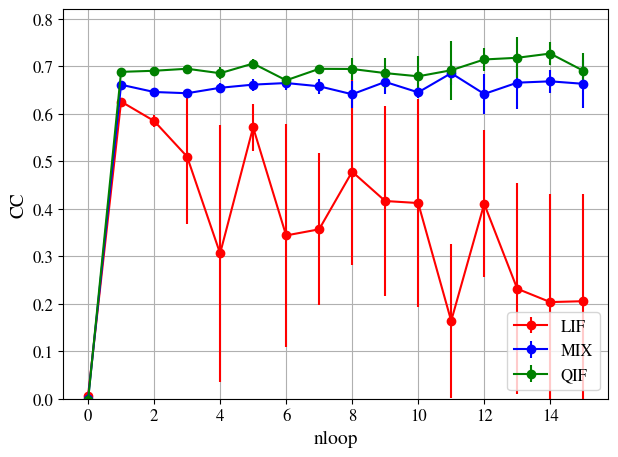

In [8]:
for i in range(len(pqif_values)):

    data_pqif = data[data['pqif'] == pqif_values[i]]
    grouped_data = data_pqif.groupby(['nloop'])

    for columna in ['cc']:
        print(columna)
        grouped_column_data = grouped_data[columna].agg(['mean', 'std']).reset_index()

        if pqif_values[i] == 0:
            plt.errorbar(grouped_column_data['nloop'], grouped_column_data['mean'], yerr=grouped_column_data['std'], label=f'LIF', color = 'r', fmt='-o')
        if pqif_values[i] == 0.5:
            plt.errorbar(grouped_column_data['nloop'], grouped_column_data['mean'], yerr=grouped_column_data['std'], label=f'MIX', color = 'b', fmt='-o')   
        if pqif_values[i] == 1:      
            plt.errorbar(grouped_column_data['nloop'], grouped_column_data['mean'], yerr=grouped_column_data['std'], label=f'QIF', color = 'g', fmt='-o')            

    # Agregar leyenda al subplot actual

plt.xlabel('nloop')
plt.ylabel('CC')
plt.ylim(0, 0.82)
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

Miremos las distribuciones de los motifs pre y post training

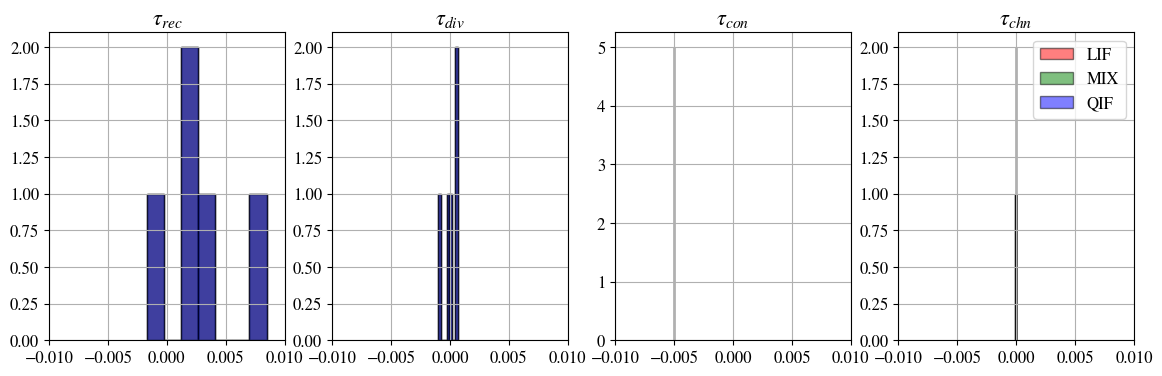

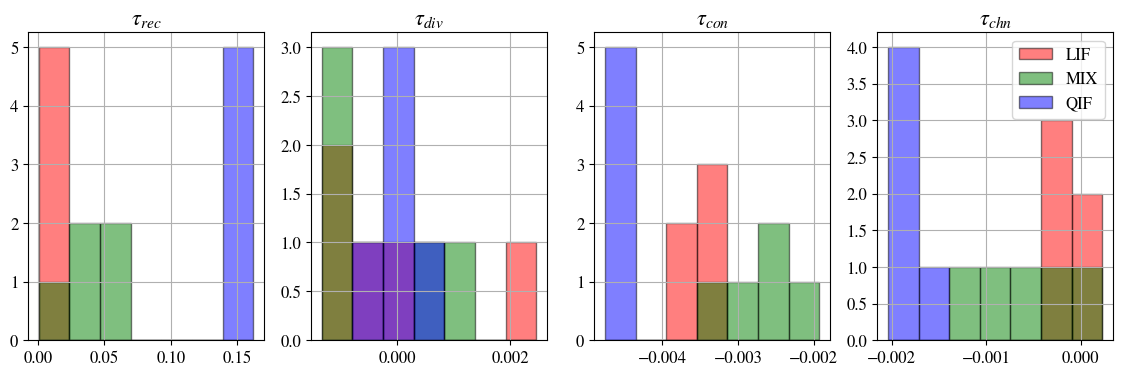

In [9]:
# Crear histogramas para cada columna de tau con nloop = 0
columns_tau = ['tau_rec', 'tau_div', 'tau_con', 'tau_chn']
columns_tau_latex = [r'$\tau_{rec}$', r'$\tau_{div}$', r'$\tau_{con}$', r'$\tau_{chn}$']


for loop in [0, nloop-1]:
    fig = plt.figure(figsize=(14, 4))

    df_filtered = data[(data['nloop'] == loop)]

    for idx, column in enumerate(columns_tau):
        plt.subplot(1, 4, idx + 1)
        min_val = np.min(df_filtered[column])
        max_val = np.max(df_filtered[column])
        
        for i in range(len(pqif_values)):

            df_pqif = df_filtered[df_filtered['pqif'] == pqif_values[i]]
            
            bins = np.linspace(min_val, max_val, 8)
            
            mean = np.mean(df_pqif[column])
            mean_formatted = f'{mean:.4f}'

            if pqif_values[i] == 0:
                plt.hist(df_pqif[column], bins, edgecolor='black', color='r', label= 'LIF', alpha=0.5)
            if pqif_values[i] == 1:
                plt.hist(df_pqif[column], bins, edgecolor='black', color='b', label= 'QIF', alpha=0.5)
            if pqif_values[i] == 0.5:
                plt.hist(df_pqif[column], bins, edgecolor='black', color='g', label= 'MIX',  alpha=0.5)
            
            plt.title(columns_tau_latex[idx])
            plt.grid()
         
            if loop == 0 :
                plt.xlim(-0.01, 0.01)
    plt.legend()
    plt.show()



Cambiemos el formato de los valores de pqif para que sean compatibles con los nombres de los archivos

In [10]:
def first_significant_digit(value):
    """
    Devuelve la primera cifra significativa de un valor dado.
    """
    # Convertir el valor a una cadena para poder manipularlo
    str_value = f'{value:.10f}'  # Limitar la precisión para evitar problemas de punto flotante
    
    if '.' in str_value:
        str_value = str_value.rstrip('0').rstrip('.')  # Eliminar ceros innecesarios al final del número
    
    return str_value  # Devuelve el valor completo sin ceros innecesarios



# Obtener los valores únicos de 'pqif'
pqif_values = data['pqif'].unique()

Analizemos `tau_rec`

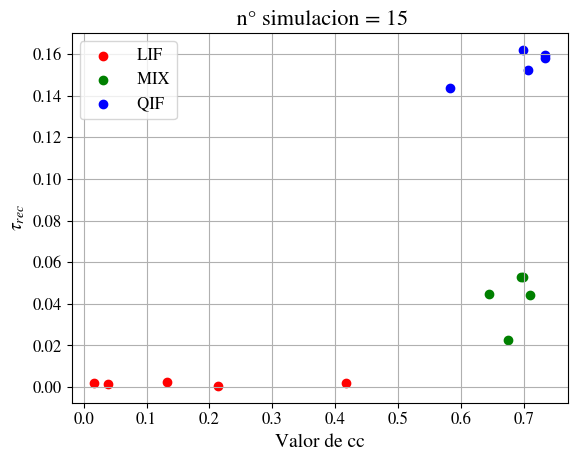

In [11]:
data_nloop_11 = data[data['nloop'] == 11]


# Iterar sobre cada valor único de 'pqif'
for i, pqif_value in enumerate(pqif_values):
    # Filtrar los datos para este valor de 'pqif'
    data_pqif = data_nloop_11[data_nloop_11['pqif'] == pqif_value]

    # Obtener los valores de tau_rec y cc para este valor de 'pqif'
    tau_rec_values = data_pqif['tau_rec']
    cc_values = data_pqif['cc']

    if pqif_value == 0:
        label = 'LIF'
        color = 'r'
    elif pqif_value == 0.5:
        label = 'MIX'
        color = 'g'
    elif pqif_value == 1:
        label = 'QIF'
        color = 'b'


    # Graficar tau_rec vs cc para este valor de 'pqif'
    plt.scatter(cc_values, tau_rec_values, label=f' {label}', color=color)

    plt.title(f' n° simulacion = {num_sim}')


    plt.xlabel('CC')
    plt.ylabel('Tau_rec')

    # Ajustar el diseño del subplot
    plt.grid(True)


    if i == 2:
        plt.legend()
        


plt.title(f' n° simulacion = {num_sim}')


plt.xlabel('Valor de cc')
plt.ylabel(r'$\tau_{rec}$')

plt.legend()
plt.grid(True)
plt.show()



In [12]:
def motifs(w,N):
    
    w=w-np.mean(w)
    
    ww=np.matmul(w,w)
    wtw=np.matmul(w.T,w)
    wwt=np.matmul(w,w.T)
    
    sigma2=np.trace(wwt)/N
    
    tau_rec=np.trace(ww)
    tau_rec/=sigma2*N
    
    tau_div=np.sum(wwt)-np.trace(wwt)
    tau_div/=sigma2*N*(N-1)
    
    tau_con=np.sum(wtw)-np.trace(wtw)
    tau_con/=sigma2*N*(N-1)
    
    tau_chn=2*(np.sum(ww)-np.trace(ww))
    tau_chn/=sigma2*N*(N-1)
    
    return sigma2,tau_rec,tau_div,tau_con,tau_chn

En los casos mixtos, separemos las interacciones QIF-QIF, QIF.LIF, LIF-QIF, LIF-LIF. Implementar cuando sea necesario

(-0.02, 0.264)

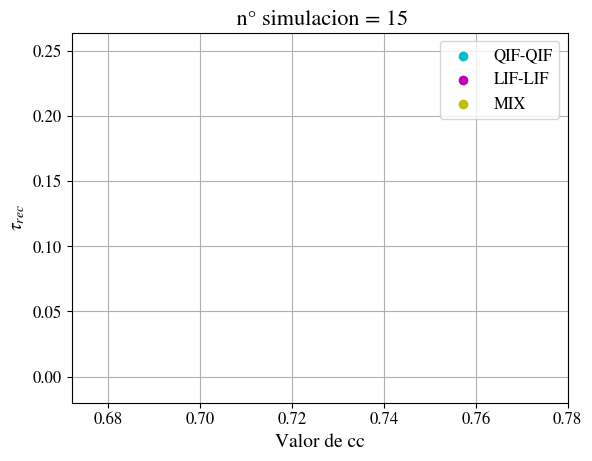

In [13]:
pqif_mix = pqif_values[(pqif_values != 0) & (pqif_values != 1)]

tau_rec_cuadrante1 = []
tau_rec_cuadrante2 = []
tau_rec_cuadrante3 = []
tau_rec_cuadrante4 = []


cc_values = []

pqif = 0.5

# Bucle sobre las semillas
for k in range(cant_seed):
    # Simular y calcular tau_rec para cada cuadrante
    matrix = csv_to_matrix(f'simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
    rows, cols = matrix.shape
    mid_row, mid_col = rows // 2, cols // 2
    cuadrante1 = matrix[:mid_row, :mid_col]
    cuadrante2 = matrix[:mid_row, mid_col:]
    cuadrante3 = matrix[mid_row:, :mid_col]
    cuadrante4 = matrix[mid_row:, mid_col:]
    
    _, tau_rec1, _, _, _ = motifs(cuadrante1, N/2)
    _, tau_rec2, _, _, _ = motifs(cuadrante2, N/2)
    _, tau_rec3, _, _, _ = motifs(cuadrante3, N/2)
    _, tau_rec4, _, _, _ = motifs(cuadrante4, N/2)
    
    # Guardar los valores de tau_rec y cc para cada cuadrante
    tau_rec_cuadrante1.append(tau_rec1)
    tau_rec_cuadrante2.append(tau_rec2)
    tau_rec_cuadrante3.append(tau_rec3)
    tau_rec_cuadrante4.append(tau_rec4)

    # Obtener los valores de cc para esta semilla desde el archivo de resultados
    nombre_archivo = f'simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)
    data_select = data[(data['pqif'] == 0.5) & (data['nloop'] == 10) & (data['seed'] == k)]
    cc_values.append(data_select['cc'].values[0])

# Convertir las listas a arrays de numpy para facilitar el manejo de los datos
tau_rec_cuadrante1 = np.array(tau_rec_cuadrante1)
tau_rec_cuadrante2 = np.array(tau_rec_cuadrante2)
tau_rec_cuadrante3 = np.array(tau_rec_cuadrante3)
tau_rec_cuadrante4 = np.array(tau_rec_cuadrante4)
cc_values = np.array(cc_values)

# Graficar tau_rec para todos los cuadrantes en función de cc
plt.scatter(cc_values, tau_rec_cuadrante1, color='c', label='QIF-QIF')
plt.scatter(cc_values, tau_rec_cuadrante4, color='m', label='LIF-LIF')
plt.scatter(cc_values, tau_rec_cuadrante2, color='y', label='MIX')
plt.scatter(cc_values, tau_rec_cuadrante3, color='y')
plt.title(f' n° simulacion = {num_sim}')

plt.xlim(0.672, 0.78)
# Etiquetas y leyenda
plt.xlabel('Valor de cc')
plt.ylabel(r'$\tau_{rec}$')
plt.legend()
plt.grid(True)
plt.ylim(-0.02, 0.264)

Ahora visualizemos lo anterior en forma de histograma

0.0
0 5
1 5
2 5
3 5
4 5
[0. 0. 0. ... 0. 0. 0.]
0.5
oo
0 5
1 5
2 5
3 5
4 5
[0. 0. 0. ... 0. 0. 0.]
1.0
0 5
1 5
2 5
3 5
4 5
[0. 0. 0. ... 0. 0. 0.]


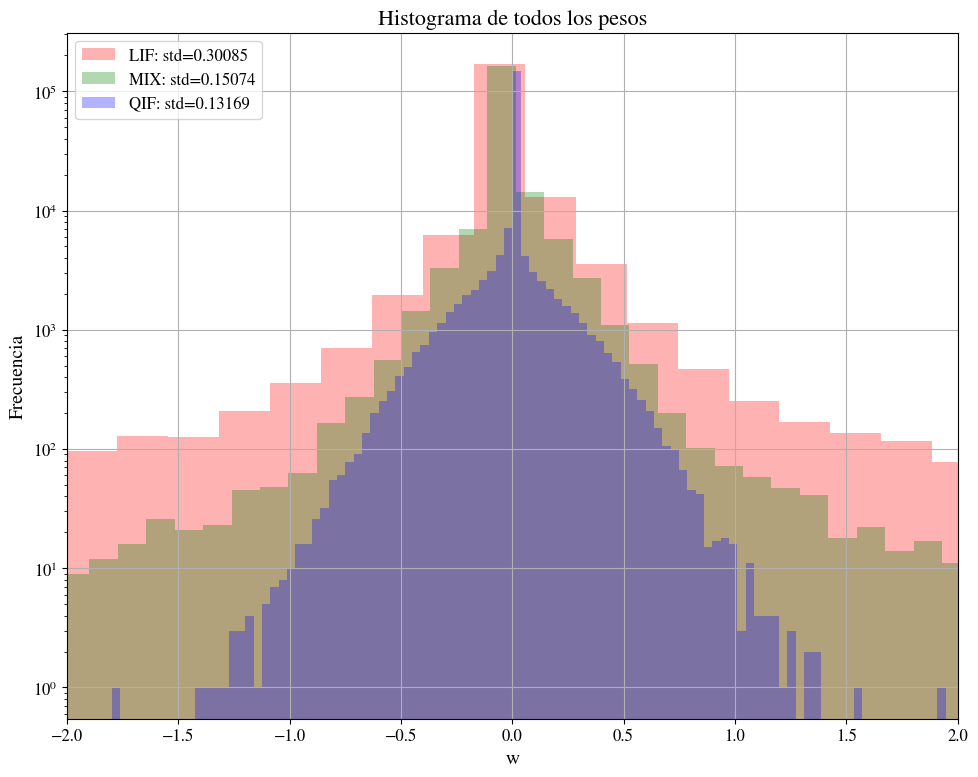

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

for i, pqif_value in enumerate(pqif_values):
    print(pqif_value)
    # Inicializar una lista para almacenar todos los pesos.
    todos_los_pesos = []

    if pqif_value == 0:
        label = 'LIF'
        color = 'r'
    elif pqif_value == 0.5:
        print('oo')
        label = 'MIX'
        color = 'g'
    elif pqif_value == 1:
        label = 'QIF'
        color = 'b'


    for k in range(cant_seed):
        print(k, cant_seed)
        # Leer la matriz desde el archivo CSV
        filename = f'simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{first_significant_digit(pqif_value)}_matriz_iloop_11_semilla_{k}'
        matrix = csv_to_matrix(filename)

        # Añadir todos los pesos de la matriz a la lista
        todos_los_pesos.extend(matrix.flatten())

    # Convertir la lista de pesos en un array de NumPy
    todos_los_pesos = np.array(todos_los_pesos)
    print(todos_los_pesos)
    # Calcular el histograma
    counts, bins = np.histogram(todos_los_pesos, bins=100)


    # Calcular la desviación estándar
    std = np.std(todos_los_pesos)
    text_x = 0.95
    text_y = 0.95
    #ax.text(text_x, text_y, f"{label}: std={std:.5f}", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=1))

    # Graficar el histograma
    ax.hist(bins[:-1], bins, weights=counts, alpha = 0.3, color = color,label = label+ f': std={std:.5f}')
  
    ax.set_title('Histograma de todos los pesos')
    ax.set_xlabel('w')
    ax.set_ylabel('Frecuencia')
    ax.set_yscale("log")
    # Calcular la desviación estándar

    ax.grid(True)
plt.legend(loc = 'upper left')
plt.xlim(-2,2)

plt.tight_layout()
plt.show()

15


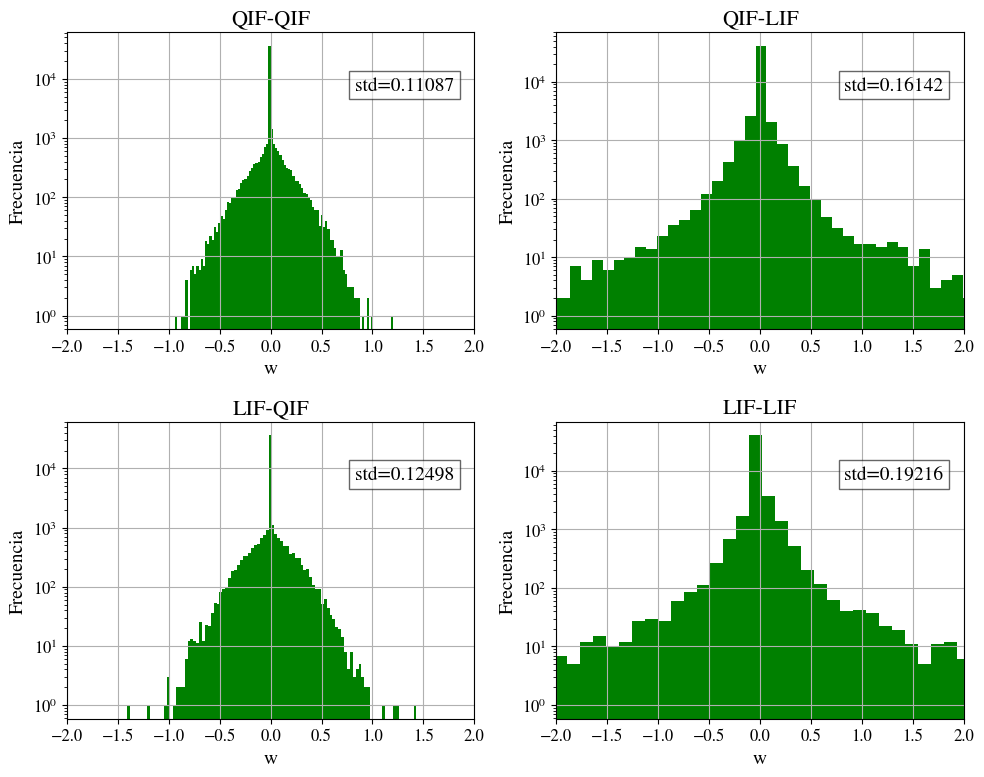

In [15]:

cuadrante1, cuadrante2, cuadrante3, cuadrante4 = np.zeros(cant_seed, dtype=object), np.zeros(cant_seed, dtype=object), np.zeros(cant_seed, dtype=object), np.zeros(cant_seed, dtype=object)


print(num_sim)

# Colores para cada pqif
colors = {0: 'red', 0.5: 'green', 1: 'blue'}


fig, axes = plt.subplots(2, 2, figsize=(10, 8))
pqif = 0.5

for k in range(cant_seed):
    matrix = csv_to_matrix(f'simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_0.5_matriz_iloop_11_semilla_{k}')
    rows, cols = matrix.shape
    mid_row, mid_col = rows // 2, cols // 2
    cuadrante1[k] = matrix[:mid_row, :mid_col]
    cuadrante2[k] = matrix[:mid_row, mid_col:]
    cuadrante3[k] = matrix[mid_row:, :mid_col]
    cuadrante4[k] = matrix[mid_row:, mid_col:]

cuadrantes = [cuadrante1, cuadrante2, cuadrante3, cuadrante4]

titulos = ['QIF-QIF', 'QIF-LIF', 'LIF-QIF', 'LIF-LIF']
for m, ax in enumerate(axes.flatten()):
    # Concatenar todas las matrices del cuadrante en una sola matriz
    cuadrante_combined = np.concatenate([mat.flatten() for mat in cuadrantes[m]])
    
    # Construir el histograma en el subplot correspondiente
    counts, bins = np.histogram(cuadrante_combined, bins=100)
    std = np.std(cuadrante_combined)
    text_x = 0.95
    text_y = 0.95 - 0.1 * list(colors.keys()).index(pqif)  # Adjust y position to avoid overlap
    
    # Graficar el histograma con color específico
    ax.hist(bins[:-1], bins, weights=counts, color=colors[pqif], label=f'pqif={pqif}')
    ax.text(text_x, text_y, f"std={std:.5f}", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.6))

    ax.set_title(titulos[m])
    ax.set_xlabel('w')
    ax.set_ylabel('Frecuencia')
    ax.set_yscale("log")
    ax.set_xlim(-2, 2)
    ax.grid(True)

plt.tight_layout()
plt.show()

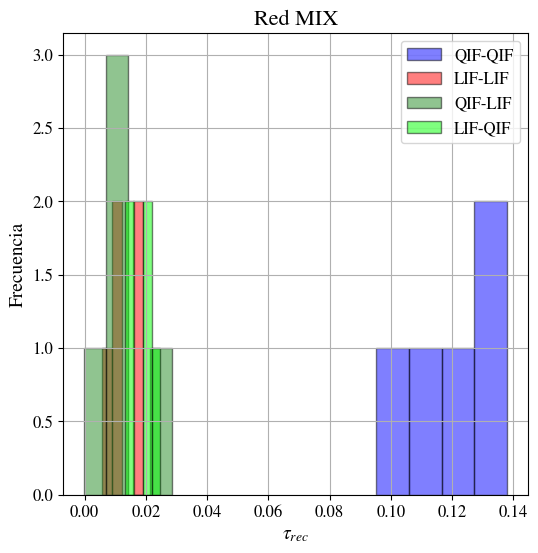

In [16]:
def motifs(w,N):
    
    w=w-np.mean(w)
    
    ww=np.matmul(w,w)
    wtw=np.matmul(w.T,w)
    wwt=np.matmul(w,w.T)
    
    sigma2=np.trace(wwt)/N
    
    tau_rec=np.trace(ww)/N
    tau_rec/=sigma2
    
    tau_div=np.sum(wwt)-np.trace(wwt)
    tau_div/=sigma2*N*(N-1)
    
    tau_con=np.sum(wtw)-np.trace(wtw)
    tau_con/=sigma2*N*(N-1)
    
    tau_chn=2*(np.sum(ww)-np.trace(ww))
    tau_chn/=sigma2*N*(N-1)
    
    return sigma2,tau_rec,tau_div,tau_con,tau_chn


tau_rec_cuadrante1 = []
tau_rec_cuadrante2 = []
tau_rec_cuadrante3 = []
tau_rec_cuadrante4 = []

# Bucle sobre las semillas
for k in range(cant_seed):
    # Leer y procesar la matriz de pesos para cada semilla
    matrix = csv_to_matrix(f'simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
    rows, cols = matrix.shape
    mid_row, mid_col = rows // 2, cols // 2

    cuadrante1 = matrix[:mid_row, :mid_col]
    cuadrante2 = matrix[:mid_row, mid_col:]
    cuadrante3 = matrix[mid_row:, :mid_col]
    cuadrante4 = matrix[mid_row:, mid_col:]

    _, tau_rec1, _, _, _ = motifs(cuadrante1, N/2)
    _, tau_rec2, _, _, _ = motifs(cuadrante2, N/2)
    _, tau_rec3, _, _, _ = motifs(cuadrante3, N/2)
    _, tau_rec4, _, _, _ = motifs(cuadrante4, N/2)

    # Guardar los valores de tau_rec para cada cuadrante
    tau_rec_cuadrante1.append(tau_rec1)
    tau_rec_cuadrante2.append(tau_rec2)
    tau_rec_cuadrante3.append(tau_rec3)
    tau_rec_cuadrante4.append(tau_rec4)

# Convertir las listas a arrays de numpy para facilitar el manejo de los datos
tau_rec_cuadrante1 = np.array(tau_rec_cuadrante1)
tau_rec_cuadrante2 = np.array(tau_rec_cuadrante2)
tau_rec_cuadrante3 = np.array(tau_rec_cuadrante3)
tau_rec_cuadrante4 = np.array(tau_rec_cuadrante4)

# Graficar los histogramas de tau_rec para cada cuadrante en los mismos ejes
plt.figure(figsize=(6, 6))

plt.hist(tau_rec_cuadrante1, bins=4, color='b', alpha=0.5, edgecolor = 'black', label='QIF-QIF')
plt.hist(tau_rec_cuadrante4, bins=4, color='r', alpha=0.5, edgecolor = 'black', label='LIF-LIF')
plt.hist(tau_rec_cuadrante2, bins=4, color='forestgreen', alpha=0.5, edgecolor = 'black', label='QIF-LIF')
plt.hist(tau_rec_cuadrante3, bins=4, color='lime', alpha=0.5, edgecolor = 'black', label='LIF-QIF')   


plt.xlabel(r'$\tau_{rec}$')
plt.ylabel('Frecuencia')
plt.title('Red MIX')
plt.legend()
plt.grid(True)
plt.show()

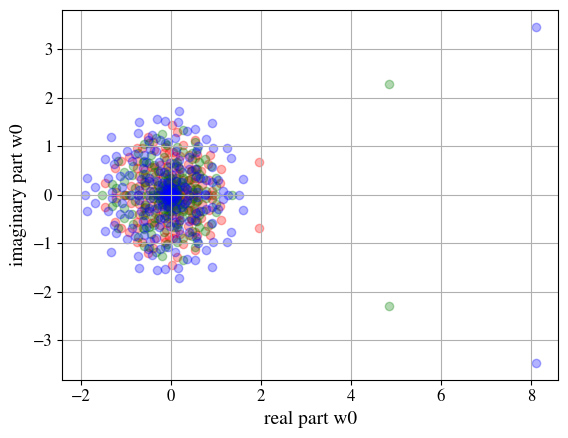

In [17]:
for i, pqif_value in enumerate(pqif_values):

    filename = f'simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{first_significant_digit(pqif_value)}_matriz_iloop_11_semilla_{k}'
    matrix = csv_to_matrix(filename)  # Aquí usas tu función definida en otra celda del notebook        
    eigenval,eigenvec=np.linalg.eig(matrix)
    ar=np.real(eigenval)
    ai=np.imag(eigenval)
    label, color = label_color(pqif_value)
    plt.scatter(ar,ai, color = color, label = label, alpha = 0.3)

        
plt.xlabel('real part w0')
plt.ylabel('imaginary part w0')

plt.grid()
        
plt.show()